In [1]:
# confusion_matrix_metrics.py
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Binary classification for Confusion Matrix
data = load_iris()
X, y = data.data, data.target
X_bin = X[y != 2]
y_bin = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Confusion Matrix:
 [[17  0]
 [ 0 13]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


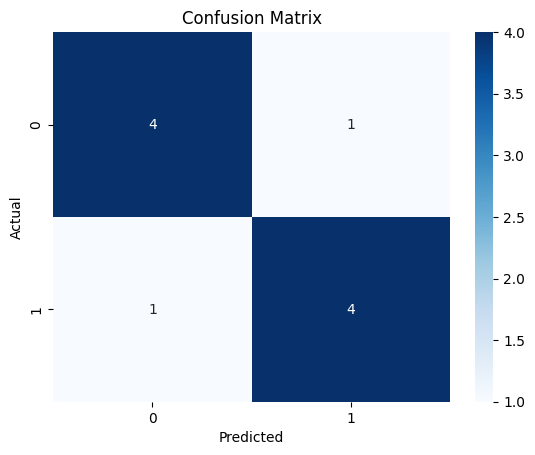

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



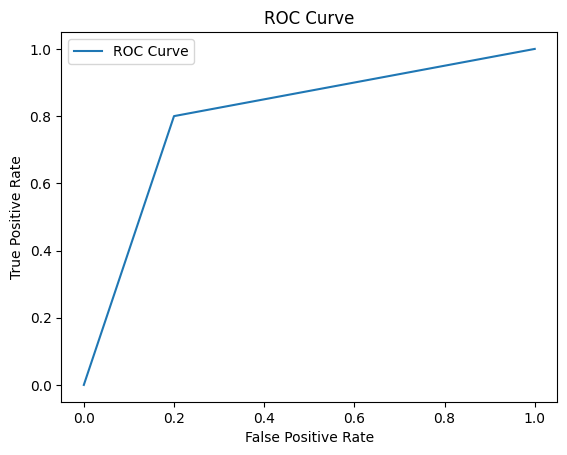

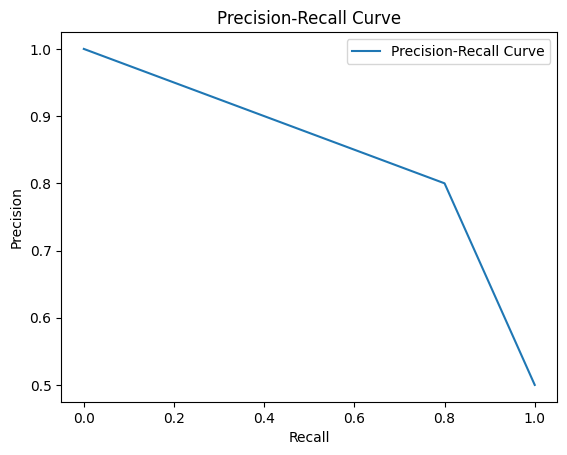

AUC Score: 0.8


In [2]:
# error_analysis_visual.py
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Dummy binary test example
y_test = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
y_pred = [0, 1, 0, 0, 0, 1, 1, 1, 0, 1]

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# AUC Score
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc_score)

In [5]:
# k_fold_cross_validation.py
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Define model
model = RandomForestClassifier()

# Define K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold Cross-Validation
scores = cross_val_score(model, X, y, cv=kf)
print("K-Fold Scores:", scores)
print("Mean Score:", scores.mean())

K-Fold Scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean Score: 0.9600000000000002


In [4]:
# leave_one_out_cv.py
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Define model
model = RandomForestClassifier()

# Define Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Perform LOOCV
scores = cross_val_score(model, X, y, cv=loo)
print("LOOCV Mean Score:", scores.mean())

LOOCV Mean Score: 0.96


In [3]:
# stratified_k_fold.py
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Define model
model = RandomForestClassifier()

# Define Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Stratified K-Fold Cross-Validation
scores = cross_val_score(model, X, y, cv=skf)
print("Stratified K-Fold Scores:", scores)
print("Mean Stratified Score:", scores.mean())

Stratified K-Fold Scores: [0.96666667 0.96666667 0.93333333 1.         0.9       ]
Mean Stratified Score: 0.9533333333333334
